In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("student_grades_new_dataset.csv")
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [3]:
def mapgrade(x):
    if x < 1:
        return 4
    if x < 2:
        return 3
    if x < 3:
        return 2.5
    if x < 4:
        return 2
    else:
        return 1
    
df['GradeClass'] = df['GradeClass'].map(mapgrade)

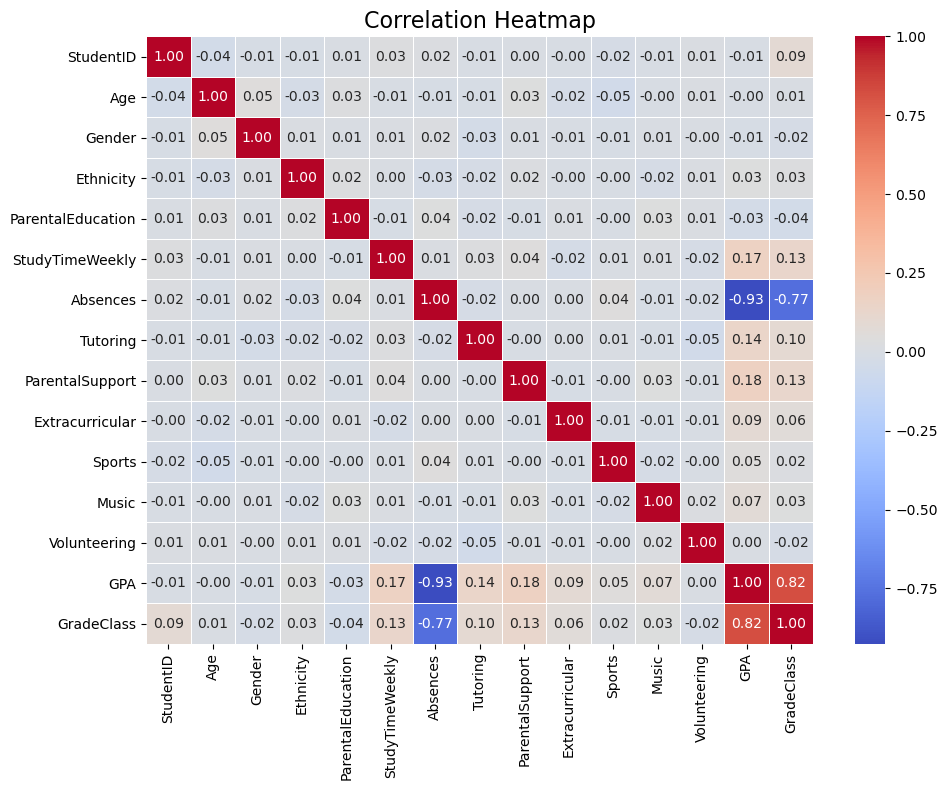

In [4]:
# Compute the correlation matrix
corr_matrix = df.corr("spearman")

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar=True)

# Add title and adjust layout
plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [6]:
df.drop(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'ParentalSupport', 'Music', 'Volunteering', 'GPA'], axis = 1, inplace = True)

In [7]:
from sklearn.model_selection import train_test_split
x, y = df[df.columns[:-1]], df['GradeClass']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 420)

<Axes: ylabel='Density'>

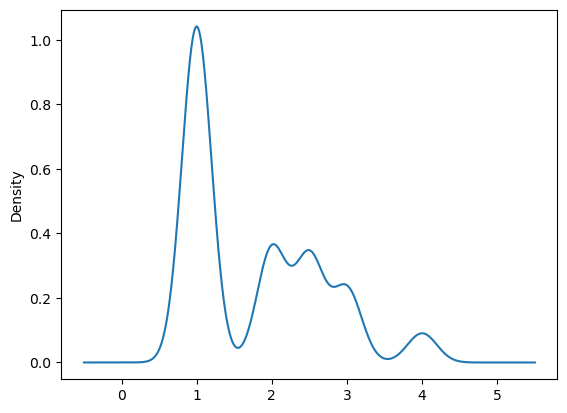

In [8]:
y_train.plot.kde()

In [9]:
from sklearn.ensemble import ExtraTreesRegressor

extra_trees = ExtraTreesRegressor(n_estimators = 150)

extra_trees.fit(x_train,  y_train)

ExtraTreesRegressor(n_estimators=150)

In [10]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, precision_score, recall_score, classification_report

In [11]:
y_hat = extra_trees.predict(x_test)

# p = classification_report(y_test, y_hat)
# r = recall_score(y_test, y_hat)

# print(p)
# print(r)

mse = mean_squared_error(y_test, y_hat)
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)

print("R2: ", r2)
print("MSE: ", mse)
print("MAE: ", mae)

R2:  0.5021317884287038
MSE:  0.3961652284852702
MAE:  0.3860334029227558


In [12]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()

gb.fit(x_train, y_train)

GradientBoostingRegressor()

In [13]:
y_hat = gb.predict(x_test)

# p = classification_report(y_test, y_hat)
# r = recall_score(y_test, y_hat)

# print(p)
# print(r)

mse = mean_squared_error(y_test, y_hat)
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)

print("R2: ", r2)
print("MSE: ", mse)
print("MAE: ", mae)

R2:  0.6540454089993288
MSE:  0.27528405390003974
MAE:  0.34343076570548664


In [14]:
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

stacking_regressor = StackingRegressor(estimators = [('XGB', XGBRegressor()), ('SVR',SVR()), ('ET',ExtraTreesRegressor())], final_estimator = GradientBoostingRegressor())

stacking_regressor.fit(x_train, y_train)

StackingRegressor(estimators=[('XGB',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_ra...in=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                              ('SVR', SVR()), ('ET', ExtraTreesRegressor())],
                  final_estimator=GradientBoostingRegressor())

In [15]:
y_hat = stacking_regressor.predict(x_test)

# p = classification_report(y_test, y_hat)
# r = recall_score(y_test, y_hat)

# print(p)
# print(r)

mse = mean_squared_error(y_test, y_hat)
mae = mean_absolute_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)

print("R2: ", r2)
print("MSE: ", mse)
print("MAE: ", mae)

R2:  0.667716364157073
MSE:  0.2644057593076082
MAE:  0.3309336797178655


In [16]:
x_train.columns

Index(['StudyTimeWeekly', 'Absences', 'Tutoring', 'Extracurricular', 'Sports'], dtype='object')

In [17]:
stacking_regressor.predict([[20, 5, 1, 1, 1]])

/Users/shadyali/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Users/shadyali/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


array([3.6685565])

In [18]:
import joblib

# joblib to save
joblib.dump(stacking_regressor,'Stacking_Regressor')

['Stacking_Regressor']

In [19]:
df.columns

Index(['StudyTimeWeekly', 'Absences', 'Tutoring', 'Extracurricular', 'Sports',
       'GradeClass'],
      dtype='object')